In [ ]:
jupyter nbconvert Presentatie.ipynb --to slides --post serve

## Radio  Russia
----
Design a frequency distribution for Ukraine, USA, China & Russia

Less frequencies is better

Even distribution is better

Rephrase frequency to colour

#### Possible Solution 
----
* Four Colour Theorem

* Graph Colouring

    * Greedy Algorithm
    
    * DSatur Algorithm

![Graphcolouring](https://i.imgur.com/sulDxA0.png)

*Source: A Guide to Graph Colouring: Algorithms and Applications - R.M.R. Lewis (2016)*

## Gathering Data
----

Wikidata

In [3]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql = SPARQLWrapper("https://query.wikidata.org/sparql")

sparql.setQuery("""SELECT ?oblastLabel ?borderLabel WHERE {
  ?oblast wdt:P31 wd:Q3348196.
  ?border wdt:P47 ?oblast.
 
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE],en". }
}""")

sparql.setReturnFormat(JSON)
results = sparql.query().convert()

oblasts = []
for result in results["results"]["bindings"]:
    nb_oblasts = result['oblastLabel']['value'], result['borderLabel']['value']
    oblasts.append(nb_oblasts)
print(oblasts[:10])

[('Zhytomyr Oblast', 'Vinnytsia Oblast'), ('Zhytomyr Oblast', 'Kyiv Oblast'), ('Zhytomyr Oblast', 'Khmelnytsky Oblast'), ('Zhytomyr Oblast', 'Rivne Oblast'), ('Zhytomyr Oblast', 'Gomel Region'), ('Cherkasy Oblast', 'Poltava Oblast'), ('Cherkasy Oblast', 'Kyiv Oblast'), ('Cherkasy Oblast', 'Kirovohrad Oblast'), ('Kherson Oblast', 'Dnipropetrovsk Oblast'), ('Kherson Oblast', 'Zaporizhzhya Oblast')]


In [27]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

class country:

    cg = nx.Graph()
    countryName = ""

    def __init__(self, name, csvfile):
        self.countryName = name

        with open(csvfile, encoding="utf8") as csvfile:
            countryFile = csv.reader(csvfile)
            provincePairs = [pair for pair in countryFile][1:]
            provinceNames = list(set(x[0] for x in provincePairs))

        # adding names and pairs to Graph
        self.cg = nx.Graph()
        self.cg.add_nodes_from(provinceNames, freq=None)
        self.cg.add_edges_from(provincePairs)
        
    def visualisation(self):

        nx.spring_layout(self.cg)

        plt.figure(figsize=(15,15))

        pos = nx.spring_layout(self.cg)
        nx.draw_networkx_nodes(self.cg, pos,
                                nodelist=self.cg.nodes(),
                                node_color='yellow', # change this
                                alpha=0.4)
        nx.draw_networkx_labels(self.cg, pos,
                                nodelist=self.cg.nodes(),
                                font_size=14)
        nx.draw_networkx_edges(self.cg, pos,
                                edgelist=self.cg.edges(),
                                edge_color="grey")
        plt.axis('off')
        plt.show()
            
    def distribution(self):
        freqfreq = Counter(list(nx.get_node_attributes(self.cg, 'freq').values()))

        radioFrequencies = freqfreq.keys()
        freqFrequencies = freqfreq.values()
        y_pos = np.arange(len(radioFrequencies))

        plt.bar(y_pos, freqFrequencies, align='center', alpha=0.5)
        plt.xticks(y_pos, radioFrequencies)
        plt.ylabel('Frequency')
        print(self.countryName)
        plt.title('Frequency of radio frequencies in ' + self.countryName)

        plt.show()

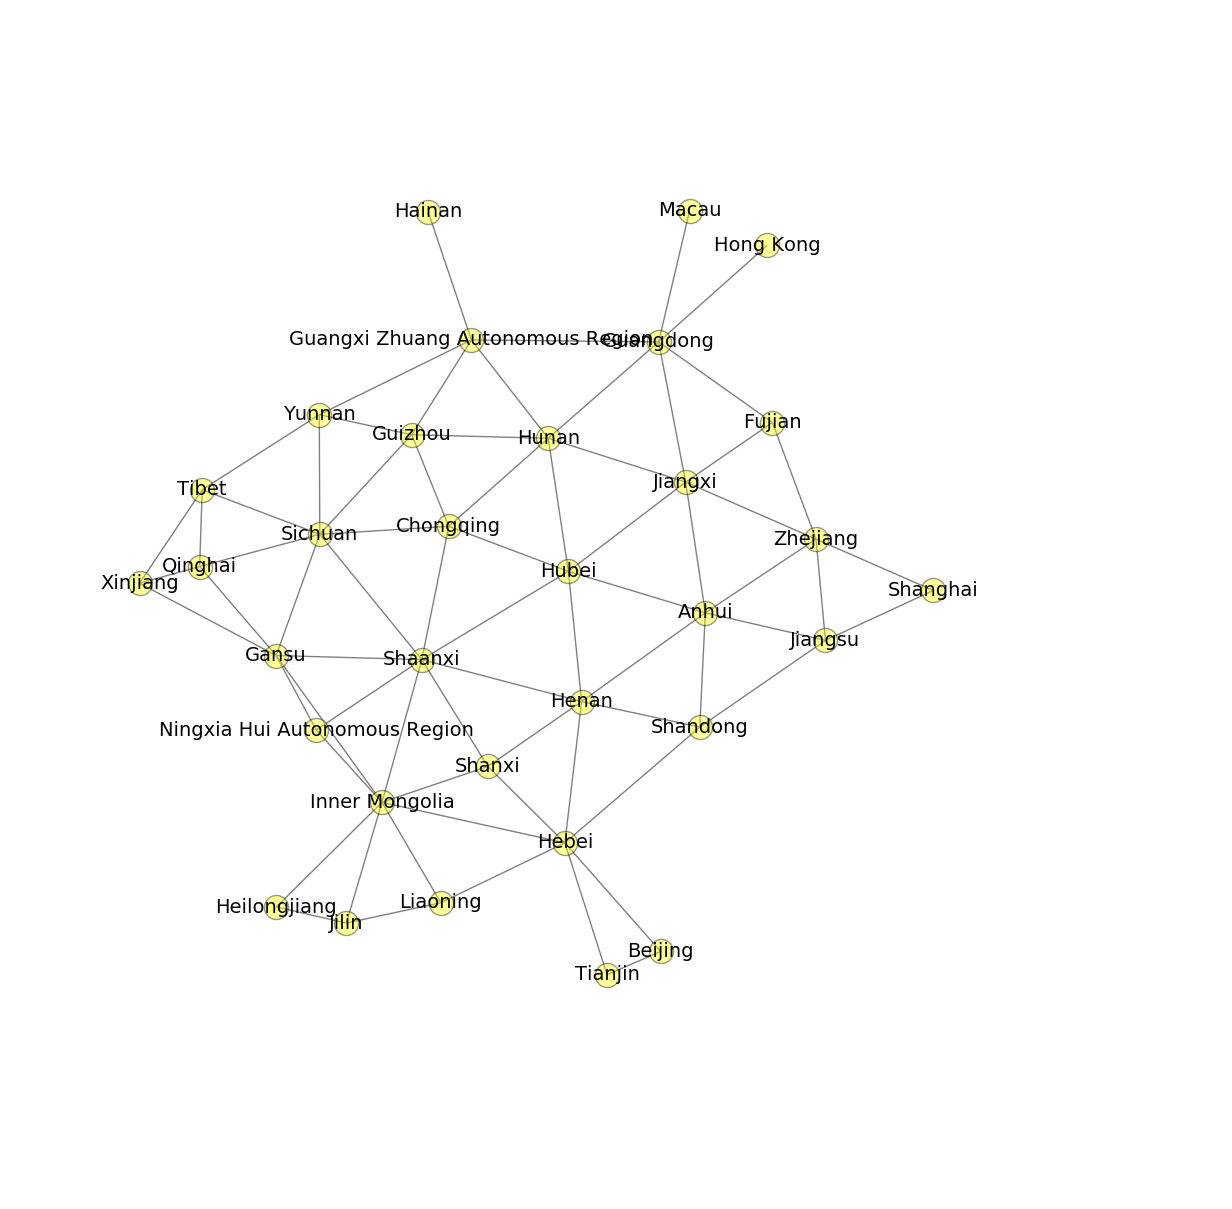

In [40]:
CN  = country("Ukraine", "../csv-borders/ChinaCompleteDataset.csv")
CN.visualisation()

## Algorithms
---
Greedy & Experimentation

In [29]:
class algorithm:
    def pairCheck(graph, node1, node2):
        '''
        Returns True if both nodes don't share a radio frequency.
        '''
        if graph.node[node1]['freq'] is not None and graph.node[node2]['freq'] is not None and graph.node[node1]['freq'] == graph.node[node2]['freq']:
            return False
        return True

    def neighborCheck(graph, node):
        '''
        Returns True if node doens't share a frequency with any of its neighbours.
        '''
        for neighbor in nx.all_neighbors(graph, node):
            if not algorithm.pairCheck(graph, node, neighbor):
                return False
        return True

    def graphCheck(graph):
        '''
        Returns True if all nodes don't share a frequency with any of their neighbours.
        '''
        for node in graph.nodes():
            if not algorithm.neighborCheck(graph, node):
                return False

        if None in nx.get_node_attributes(graph, 'freq').values():
            return False

        return True

In [30]:
class greedy(algorithm):
    def __init__(self, graph):
        '''
        Fills in the frequencies based on a greedy algorithm.
        '''
        for n in graph.nodes():
            graph.node[n]['freq'] = 1
            while not algorithm.neighborCheck(graph, n):
                graph.node[n]['freq'] += 1

In [31]:
class greedyAlphabetically(algorithm):
    '''
    Fills in the frequencies based on a greedy algorithm with an 
    alphabetically sorted list of nodes.
    '''
    def __init__(self, graph):
        for n in sorted(graph.nodes(), key=str.lower, reverse=False):
            graph.node[n]['freq'] = 1
            while algorithm.neighborCheck(graph, n) == False:
                graph.node[n]['freq'] += 1

In [32]:
class greedyLowDegreeSorted(algorithm):
    '''
    Fills in the frequencies based on a greedy algorithm starting with the
    lowest degree
    '''
    def __init__(self, graph):
        degree = sorted([(n, graph.degree(n)) for n in graph.nodes()])
        for n in degree:
            graph.node[n[0]]['freq'] = 1
            while not algorithm.neighborCheck(graph, n[0]):
                graph.node[n[0]]['freq'] += 1

In [33]:
class greedyHighDegreeSorted(algorithm):
    '''
    Fills in the frequencies based on a greedy algorithm starting with the
    highest degree
    '''
    def __init__(self, graph):
        degree = sorted([(n, graph.degree(n)) for n in graph.nodes()], key=lambda x: x[1], reverse = True)
        for n in degree:
            graph.node[n[0]]['freq'] = 1
            while not algorithm.neighborCheck(graph, n[0]):
                graph.node[n[0]]['freq'] += 1

Russia


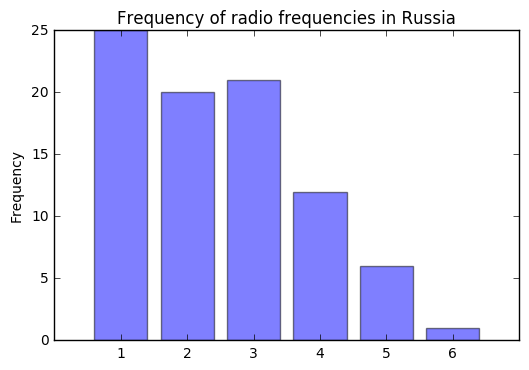

In [42]:
RU = country("Russia", "../csv-borders/NewRussiaCompleteDataset.csv")
greedy(RU.cg)
RU.distribution()

Russia


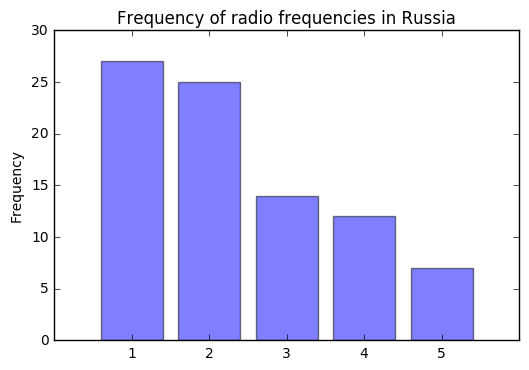

In [46]:
RU = country("Russia", "../csv-borders/NewRussiaCompleteDataset.csv")
greedyAlphabetically(RU.cg)
RU.distribution()

Russia


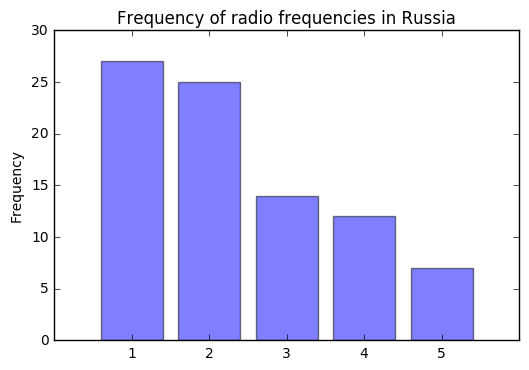

In [45]:
RU = country("Russia", "../csv-borders/NewRussiaCompleteDataset.csv")
greedyLowDegreeSorted(RU.cg)
RU.distribution()

Russia


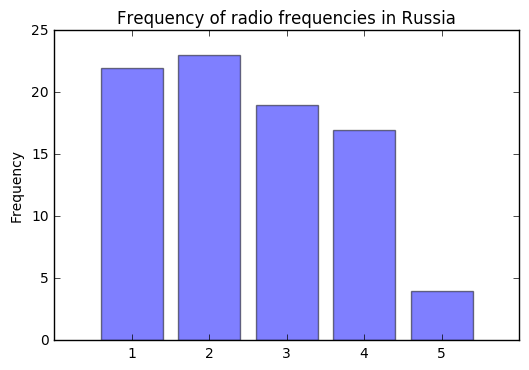

In [44]:
RU = country("Russia", "../csv-borders/NewRussiaCompleteDataset.csv")
greedyHighDegreeSorted(RU.cg)
RU.distribution()

# Questions?